In [14]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
face1 = spy.io.loadmat('./HW1data/face1.mat')
face1=face1['face1']

In [16]:
face2 = spy.io.loadmat('./HW1data/face2.mat')
face2=face2['face2']

In [17]:
160*138

22080

In [7]:
face1[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [8]:
face1[:,0].reshape(160,138).T

array([[  0,   0,   0, ..., 196, 178,   0],
       [  0,   0,   0, ..., 195, 180,   0],
       [  0,   0,   0, ..., 200, 187,   0],
       ...,
       [  0,   0,   0, ..., 185,   0,   0],
       [  0,   0,   0, ..., 179,   0,   0],
       [  0,   0,   0, ..., 189,   0,   0]], dtype=uint8)

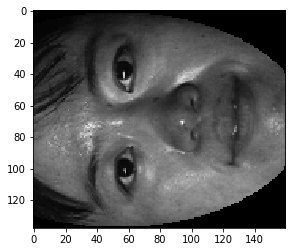

In [32]:
plt.imshow(face1[:,5].reshape(138,160),cmap='gray')

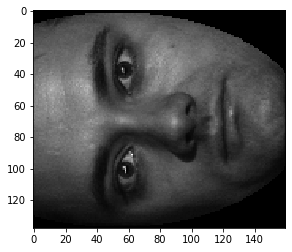

In [13]:
plt.imshow(face2[:,10].reshape(138,160),cmap='gray')

In [19]:
Qx=spy.linalg.orth(face1)

In [21]:
Qy=spy.linalg.orth(face2)

In [22]:
face1.shape,Qx.shape

((22080, 21), (22080, 21))

In [23]:
face2.shape,Qy.shape

((22080, 21), (22080, 21))

In [33]:
Ix=np.around(np.matmul(Qx.T,Qx))

In [34]:
Ix.shape

(21, 21)

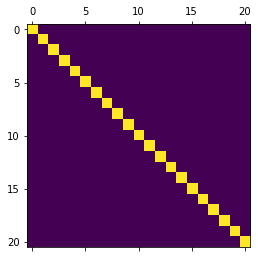

In [36]:
plt.matshow(Ix)

In [38]:
Iy=np.around(np.matmul(Qy.T,Qy))

In [39]:
Iy.shape

(21, 21)

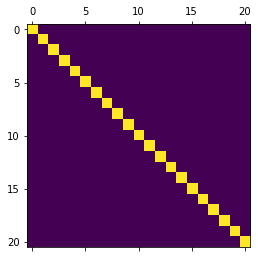

In [40]:
plt.matshow(Iy)

In [41]:
H,S,Zt=np.linalg.svd(np.matmul(Qx.T,Qy))

In [46]:
H.shape,S.shape,Zt.shape

((21, 21), (21,), (21, 21))

In [47]:
np.linalg.matrix_rank(Qx)

21

In [48]:
np.linalg.matrix_rank(Qy)

21

In [94]:
if np.linalg.matrix_rank(Qx)>=np.linalg.matrix_rank(Qy):
    Y=Qy - np.matmul(Qx,np.matmul(Qx.T,Qy))
else:
    Y=Qx - np.matmul(Qy,np.matmul(Qy.T,Qx))

In [95]:
Ssine=np.linalg.svd(Y,compute_uv=False)

In [96]:
Ssine

array([0.99999834, 0.99990861, 0.99973952, 0.99962236, 0.99910892,
       0.99863129, 0.99825476, 0.99645   , 0.99473839, 0.99001635,
       0.98905708, 0.9829811 , 0.98009161, 0.96125365, 0.94168391,
       0.93300992, 0.89832373, 0.84581562, 0.66823741, 0.4518938 ,
       0.29803986])

In [97]:
S

array([0.95455343, 0.89207174, 0.74394809, 0.53347535, 0.43933412,
       0.35985064, 0.33649876, 0.27566541, 0.19854583, 0.18370672,
       0.14753338, 0.14095259, 0.1024477 , 0.08418665, 0.05905448,
       0.05230237, 0.04220615, 0.0274797 , 0.02282303, 0.01351916,
       0.00182409])

In [98]:
S**2>0.5

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [99]:
Ssine**2<=0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True])

In [100]:
principal_angles=[]
for i in range(len(S)):
    if S[i]**2>0.5:
        theta=math.degrees(math.acos(S[i]))
    else:
        theta=math.degrees(math.asin(Ssine[i]))
    principal_angles.append(theta)

In [101]:
principal_angles

[17.339910563748468,
 26.86525312572097,
 41.9311728069301,
 88.42533116963757,
 87.5810469652095,
 87.00192678802239,
 86.6144578356026,
 85.1707441137841,
 84.11986239976306,
 81.89702798817251,
 81.51599088086625,
 79.41425940899569,
 78.54806414761977,
 73.99832756168254,
 70.33629714104032,
 68.90897609555745,
 63.938596599878245,
 57.75942788456114,
 41.93117280693008,
 26.86525312572105,
 17.339910563748408]

In [64]:
import math

In [73]:
math.cos((math.pi/4))

0.7071067811865476

In [85]:
math.degrees(math.acos(1/math.sqrt(2)))

45.00000000000001

In [83]:
math.degrees(math.pi/2)

90.0

In [79]:
math.cos(math.pi/2)

6.123233995736766e-17

In [80]:
math.pi/2

1.5707963267948966